In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
laptop= pd.read_csv('laptopcleaned_csv')

In [162]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              1272 non-null   int64  
 1   Company            1272 non-null   object 
 2   TypeName           1272 non-null   object 
 3   Inches             1272 non-null   float64
 4   screen_size        1272 non-null   object 
 5   resolution_width   1272 non-null   int64  
 6   resolution_height  1272 non-null   int64  
 7   touchscreen        1272 non-null   int64  
 8   IPS_Panel          1272 non-null   int64  
 9   cpu_brand          1272 non-null   object 
 10  cpu_name           1272 non-null   object 
 11  cpu_speed          1272 non-null   float64
 12  Ram                1272 non-null   int64  
 13  memory_type        1271 non-null   object 
 14  primary_storage    1272 non-null   int64  
 15  secondary_storage  1272 non-null   int64  
 16  gpu_brand          1272 

In [163]:
laptop.describe()

,index,Inches,resolution_width,resolution_height,touchscreen,IPS_Panel,cpu_speed,Ram,primary_storage,secondary_storage,price,ppi,price_bracket
count,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000
mean,652.813679,15.130818,1070.531447,1894.199686,0.145440,0.282233,2.298192,8.463050,448.059748,173.264151,59902.143082,145.821541,58883.647799
std,376.608478,1.954436,284.512222,494.389426,0.352683,0.450263,0.507680,5.566582,366.788872,413.745616,37297.683852,43.523965,34844.995417
min,0.000000,10.100000,768.000000,1366.000000,0.000000,0.000000,0.900000,1.000000,0.000000,0.000000,9271.000000,44.000000,10000.000000
25%,326.750000,14.000000,900.000000,1600.000000,0.000000,0.000000,2.000000,4.000000,256.000000,0.000000,31915.000000,127.000000,30000.000000
50%,652.500000,15.600000,1080.000000,1920.000000,0.000000,0.000000,2.500000,8.000000,256.000000,0.000000,52108.000000,141.000000,50000.000000
75%,980.250000,15.600000,1080.000000,1920.000000,0.000000,1.000000,2.700000,8.000000,512.000000,0.000000,79244.500000,157.000000,70000.000000
max,1302.000000,35.600000,2160.000000,3840.000000,1.000000,1.000000,3.600000,64.000000,2048.000000,2048.000000,324955.000000,352.000000,150000.000000


In [131]:
import numpy as np

laptop['price_bracket'] = np.where(laptop['price'] < 20000, 10000,
                                   np.where(laptop['price'] < 40000, 30000,
                                            np.where(laptop['price'] < 60000, 50000,
                                                     np.where(laptop['price'] < 80000, 70000,
                                                              np.where(laptop['price'] < 100000, 90000,
                                                                       np.where(laptop['price'] < 120000, 110000,
                                                                                np.where(laptop['price'] < 140000, 130000,
                                                                                        np.where(laptop['price'] > 140000, 150000, np.nan)
                                                                       )
                                                              )
                                                     )
                                            )
                                   )))


In [167]:
laptop['price_bracket'] = laptop['price_bracket'].astype(int)

# Disturibution of price brackets

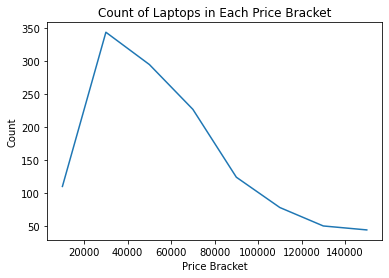

In [166]:
a = laptop['price_bracket'].value_counts().sort_index()
plt.plot(a.index, a.values)
plt.xlabel('Price Bracket')
plt.ylabel('Count')
plt.title('Count of Laptops in Each Price Bracket')
plt.show()


In [159]:
laptop['price_bracket'].value_counts()

30000     344
50000     295
70000     227
90000     124
10000     110
110000     78
130000     50
150000     44
Name: price_bracket, dtype: int64

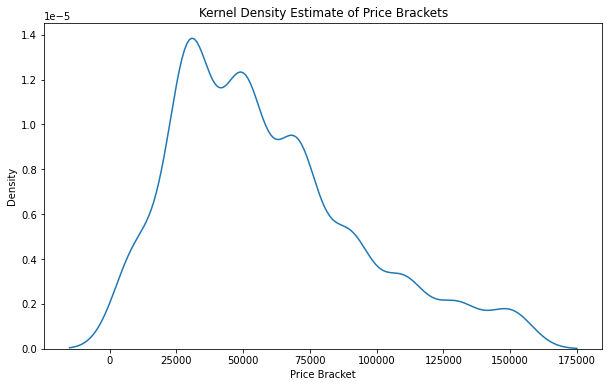

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'laptop' DataFrame contains the 'price_bracket' column
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.kdeplot(laptop['price_bracket'])
plt.xlabel('Price Bracket')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Price Brackets')
plt.show()


# Distiribution of screen sizes categories

([<matplotlib.patches.Wedge at 0x1ab237f2980>,
 [Text(-0.5334489456994013, 0.9619938785315618, 'medium'),
  Text(0.08684660982660541, -1.0965663073255651, 'small'),
  Text(1.001107552273384, -0.4558329395526323, 'large')],
 [Text(-0.2909721521996734, 0.5247239337444882, '66.1%'),
  Text(0.04737087808723931, -0.5981270767230354, '20.3%'),
  Text(0.5460586648763912, -0.24863614884689034, '13.6%')])

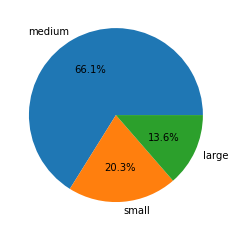

In [121]:
plt.pie(laptop['screen_size'].value_counts(),autopct='%0.1f%%',labels=laptop['screen_size'].value_counts().index)



# relation between price and screen size


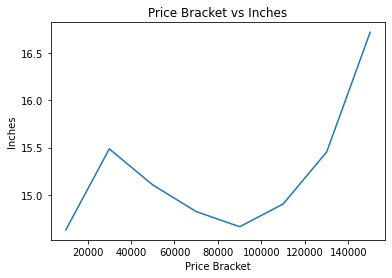

In [135]:
import matplotlib.pyplot as plt

# Assuming 'laptop' DataFrame already contains the 'price_bracket' and 'Inches' columns
grouped_data = laptop.groupby('price_bracket')['Inches'].mean()

plt.plot(grouped_data.index,grouped_data.values)
plt.xlabel('Price Bracket')
plt.ylabel('Inches')
plt.title('Price Bracket vs Inches')
plt.show()

As the price increases, screen size initially increases but eventually shows a decrease except for the flagship laptops where it rises again. This shows that lower budget laptops are given comparatively bigger screen sizes to attract customers while cutting costs in other aspects.

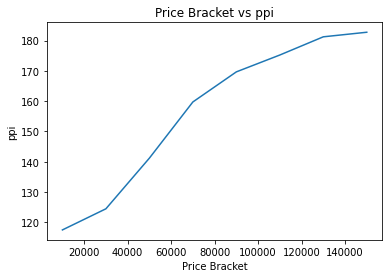

In [136]:
grouped_data = laptop.groupby('price_bracket')['ppi'].mean()

plt.plot(grouped_data.index,grouped_data.values)
plt.xlabel('Price Bracket')
plt.ylabel('ppi')
plt.title('Price Bracket vs ppi')
plt.show()

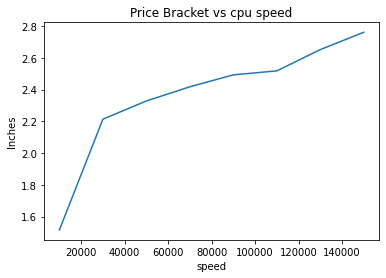

In [137]:
grouped_data = laptop.groupby('price_bracket')['cpu_speed'].mean()

plt.plot(grouped_data.index,grouped_data.values)
plt.xlabel('speed')
plt.ylabel('Inches')
plt.title('Price Bracket vs cpu speed')
plt.show()

It is clear that the price is directly proportional to the cpu speed, ppi and with the screen size upto a certain point.

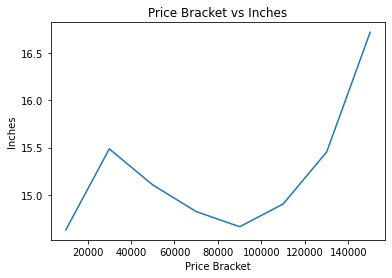

In [138]:
grouped_data = laptop.groupby('price_bracket')['Inches'].mean()

plt.plot(grouped_data.index,grouped_data.values,)
plt.xlabel('Price Bracket')
plt.ylabel('Inches')
plt.title('Price Bracket vs Inches')
plt.show()

In [156]:
laptop['Company'].value_counts()

Lenovo       290
Dell         286
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: Company, dtype: int64

Lenovo,Dell and HP produce the most laptops by a far stretch

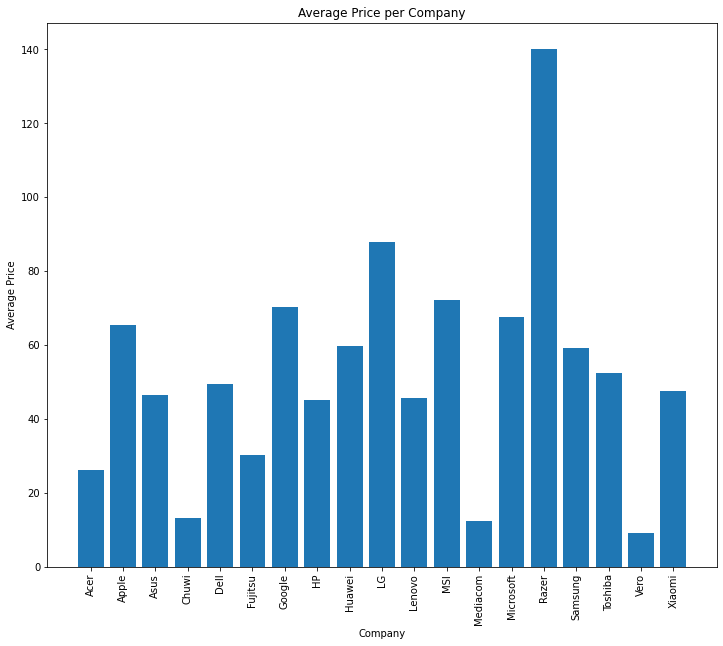

In [139]:
plt.figure(figsize=(12,10))
average_price_per_company = laptop.groupby('Company')['price'].mean()

plt.bar(average_price_per_company.index, average_price_per_company.values / len(laptop))
plt.xlabel('Company')
plt.ylabel('Average Price')
plt.title('Average Price per Company')
plt.xticks(rotation=90)
plt.show()

Razor and LG may seem to have the costliest phones but they are very low in sample size.

# Comparing screen size and ppi


Text(0.5, 0, 'Inches')

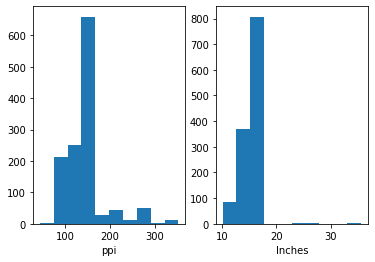

In [140]:
fig,ax= plt.subplots(1,2)
ax[0].hist(laptop['ppi'])
ax[0].set_xlabel('ppi')
ax[1].hist(laptop['Inches'])
ax[1].set_xlabel('Inches')

Both of the graphs are right skewed showing that laptops decrease in quantity over a higher ppi/size range

# Market share of windows ops across price brackets


In [141]:
a= laptop[laptop['OpSys']=='windows']

In [149]:
b1= laptop.groupby('price_bracket')['Company'].count()
b1

price_bracket
10000     110
30000     344
50000     295
70000     227
90000     124
110000     78
130000     50
150000     44
Name: Company, dtype: int64

In [144]:
b= a.groupby('price_bracket')['Company'].count()

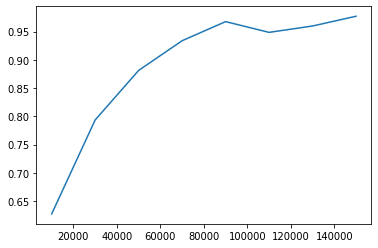

In [146]:
 plt.plot(b.index,b.values/b1.values)

This shows that as cost of the laptop increases, 'windows' operating sysem laptops are more in quantity

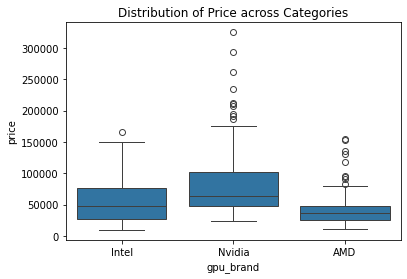

In [152]:
sns.boxplot(x='gpu_brand', y='price', data=laptop, order=['Intel', 'Nvidia', 'AMD'])
plt.xlabel('gpu_brand')
plt.ylabel('price')
plt.title('Distribution of Price across Categories')
plt.show()

Nvidia has a huge variability in the data while AMD has the least. Nvidia caters to a higher 
price range and has many extreme values as well compared to the other two brands. 
Nvidia also has a lot of its values skewed to the higher end.

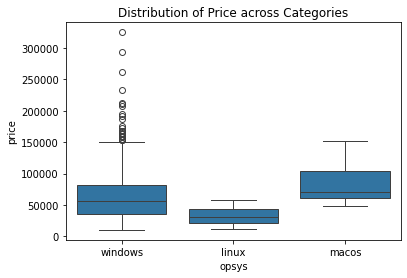

In [154]:
sns.boxplot(x='OpSys', y='price', data=laptop, order=['windows', 'linux', 'macos'])
plt.xlabel('opsys')
plt.ylabel('price')
plt.title('Distribution of Price across Categories')
plt.show()

While windows appears to be the most popular operating system by count,it clearly has a lot of 
outliers which seemed to show that it was the most prefered system in the higher end. MAC OS caters to the flagship end more than windows and is
skewed in that direction as well. Linux has a very low variability and seems to be present in budget laptops only.

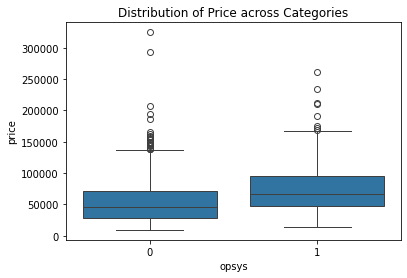

In [155]:
sns.boxplot(x='IPS_Panel', y='price', data=laptop, order=[0,1])
plt.xlabel('opsys')
plt.ylabel('price')
plt.title('Distribution of Price across Categories')
plt.show()

Costlier laptops are more likely to have the IPS panel than the cheaper ones though there are a lot of outliers where the costliest higher end models seem to have ditched the IPS model

Through the exploratory analysis we have realised that the prices of the budget and lower range smartphones have compromised on the pixel density
,display quality,cpu speed and the operating system. The display size is not compromised for the lower end phones in exhange of other factors
but it does get proportional for the midrange laptops. Linux is used in lower end laptops while Mac OS was used in most expensive models.